
# Submission Guidelines:
---

1. Homework Guidelines: Please start your work early as it takes time to understand and debug programs. Homework assignments cannot be completed in a single sitting. 
2. Homework Deadlines:  You need to complete your work on time. **No extensions** will be given for this assignment. 
3. Homework Work Package: Please keep all your **notebooks and data in a single directory** and follow the **naming convention Project-XX_First_Last.zip** 
4. Solution Notebooks: Submit your solutions as **Juypter Notebooks**.  Please use this note book as a template. You can **add cells and code** to this note book as needed. 
5. Naming File: Name the solution file as **First_Last_Group#_Project#.ipynb** where First and Last is your first and last name and Group# is your group Number. 
6. Pandas: You **CANNOT use Pandas**  as a part of your solution. Please use other modules, like csv, etc. to analyze the datasets.  
7. Test Cases: Please add other test cases as you see fit to demonstrate that your code and functions work.  
 


# Background 
---

The New York Times releases a series of data files with cumulative counts of coronavirus cases in the United States, at the state and county level, over time. It compiles this time series data from state and local governments and health departments to provide a complete record of the ongoing outbreak. Since late January, The Times has tracked coronavirus cases in real-time.

The CSV link for counties is (https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv)

You will write a program (several functions and plots) that processes this data set using Python's csv module and will plot your results and produce different types of visualizations using Matplotlib. 

## Please Update
---

Member-1: First Name, Last Name, G#

Member-2: First Name, Last Name, G#

**Honor Code**: 
We certify that:

    1. This assignment is our work.
    2. We have not taken help from any other individuals or resources while doing this assignment   
    3. Each member of the team has worked on all parts of the assignment and understand the code that is submitted as a solution.

## Generating Datasets 

The following code will generate the dataset files that are needed for this assignment. You are **not allowed** to use **pandas** in this assignment. Please use the **csv module** instead. You can use the built-in data types like strings, lists, sets and dictionaries, etc., and the Python standard library.  We are simply using it to generate the datasets here.

In [9]:
import pandas as pd

url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
df = pd.read_csv(url)
o_file = 'all.csv'
df.to_csv(o_file)
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [10]:
def create_data_set (df, state):
    file_name = state+'.csv'
    cond = df['state'] == state
    df[cond].to_csv(file_name)
    

In [11]:
state = 'Virginia'
create_data_set(df, state)

In [5]:
state = 'Maryland'
create_data_set(df, state)

## Part-1: [25 Points]
---
Write a function that reads in the dataset from the file and extracts all records for a particular state, say, Virginia, in another output file. Use the **csv module to read and write** files. The output file should have the name: Virginia.csv


In [1]:
'''
Notes: Please replace the body of the function with your code.
'''
def extract_records_for_state (input_file, output_file, state):
    file = open(input_file)
    list1 = file.readlines()
    file.close()
      
    file2 = open(output_file, 'w')
  
    for line in list1:
        category = line.split(',')
        if category[3] == state:
            file2.write(line)
    file2.close()


In [5]:
extract_records_for_state ('all.csv', 'Virginia.csv', 'Virginia')

## Part-2: [25 Points]
---
Write a function that calculates the total number of cases and deaths in a state for a **particular day**, say 1/30/2021. Pass the state and date as an argument to your function.


In [4]:
'''
Notes: Please replace the body of the function with your code.
'''
def number_of_cases_deaths_by_date (input_file, output_file, state, date):
    from csv import DictReader
    with open(input_file, 'r') as line:
        
        # Convert the file to a dictionary. Then convert that to a lost
        dict1= DictReader(line)
        list1 = list(dict1)
    
    # get data from list1 (a list of dict per row)
    cases = 0
    deaths = 0

    # Check if the state and date input match the one in the CSV file
    for row_dict in list1:
        if state == row_dict['state']:
            if date == row_dict['date']:
                
                # Increment the cases and deaths
                cases += int(row_dict['cases'])
                deaths += float(row_dict['deaths'])

    # Write the results into an output file 
    if output_file != '':
        cases_deaths = open(output_file,'w')
        
        # Make sure the results are on seperate lines
        cases_deaths.write(str(cases) + '\n')
        cases_deaths.write(str(deaths) + '\n')
        cases_deaths.close()

    return (cases, deaths)



In [5]:
'''
Notes: Write code to test out the function
'''
input_file = "all.csv"
output_file = "cases_deaths"
state = 'Virginia'
date = '2021-05-31'
a_tuple = number_of_cases_deaths_by_date (input_file, output_file, state, date)
print(a_tuple)

(675538, 11186.0)


## Part-3 [25 Points] 
---
Use the previous problem's function to **plot the cases and deaths** for **entire month** of May 2021  for each day of the month for the state of Maryland.


In [40]:
'''
Notes: Write code to test out the function
'''

from matplotlib import pyplot as plt
year = '2021'
def plot_by_month (i_file, month, state):
    # Month numbers dictionary
    month_number_dict = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06',
                        'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}

    # Total numbers of days for months
    if month == 'February':
        day_count = 28
    elif month in ['September', 'April', 'June', 'November']:
        day_count = 30
    else:
        day_count = 31
        
    #year = str(input())
    
    total_cases = []  # Initialize lists
    total_deaths = []
    month_string = month_number_dict[month]  # Set month number to variable using dictionary
    
    for day_number in range(1, day_count + 1):
        # generate the date in form 'yyyy-mm-dd' 
        date = '-'.join([str(year), month_string, str(day_number).zfill(2)])
        
        # call part 2 function to get cases and deaths
        a_tuple = number_of_cases_deaths_by_date (i_file, '', state, date)
        cases = a_tuple[0]
        deaths = a_tuple[1]
    
        # append cases and deaths to lists
        total_cases.append(cases)
        total_deaths.append(deaths)
    
    # Put the number of days into a list
    day = list(range(1, day_count+1))

    plt.plot(day, total_cases, color="g", label="cases")    # Plot the cases
    plt.plot(day, total_deaths, color="r", label="deaths")  # Plot the deaths


    plt.legend()
    plt.title("Cases and Deaths - Plot Title")
    plt.xlabel("Days")
    plt.ylabel("Cases and Deaths")
    plt.tight_layout()

    plt.show()
    return day, total_cases, total_deaths
    


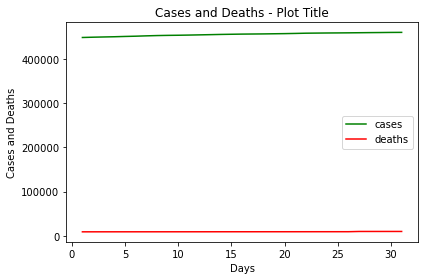

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [448529, 449180, 449701, 450201, 450880, 451458, 452226, 452882, 453316, 453592, 453992, 454463, 454937, 455449, 455827, 456196, 456408, 456619, 456956, 457275, 457718, 458239, 458483, 458711, 458871, 459069, 459308, 459555, 459740, 459989, 460106], [8764.0, 8776.0, 8797.0, 8803.0, 8813.0, 8822.0, 8833.0, 8843.0, 8851.0, 8861.0, 8870.0, 8879.0, 8896.0, 8908.0, 8925.0, 8929.0, 8932.0, 8945.0, 8957.0, 8959.0, 8973.0, 8990.0, 9007.0, 9022.0, 9029.0, 9037.0, 9581.0, 9592.0, 9599.0, 9607.0, 9614.0])


In [41]:
##
# Test Case

i_file = "all.csv"
output_file = ''
state = 'Maryland'
month = 'May'
year = '2021'
date = '05/31/2021'
func = plot_by_month(i_file, month, state)
print(func)

## Part-4: [25 Points]
Write a function that reads in the original csv file and draws a bar graph of the top ten states showing the states and the number of cases and number of deaths for a specified month. 

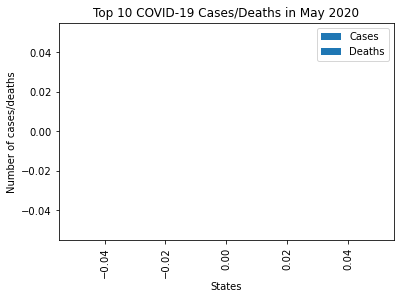

In [25]:
from matplotlib import pyplot as plt

def plot_bar_graph (input_file, month, year):
    file = open(input_file)
    list1 = file.readlines()
    file.close()
  
    months = {'01':'January',
            '02':'February',
            '03':'March',
            '04':'April',
            '05':'May',
            '06':'June',
            '07':'July',
            '08':'August',
            '09':'Septemeber',
            '10':'October',
            '11':'November',
            '12':'December'}
  
    info = []
    cases = []
    deaths = []
    states = {}
  
  
    for line in list1[1:]:
        category = line.split(',')
        date = category[1].split('-')
        year1 = date[0]
        state = category[3]
        last = category[-1].split('\n')
    
    if year1 == year:
        for key in months:
            if month == months[key]:
                if key == date[1]:
                    info.append(line)
                    cases.append(category[-2])
                    case = int(category[-2])
                    deaths.append(category[-1])
                    if (last[0]) == '':
                        death = 0
                    else:
                        death = float(last[0])
                    if state in states.keys():
                        states[state][0] += case
                        states[state][1] += death
                    else:
                        states[state] = [case,death]
                          
    sorted_dict = sorted(states.items(), key=lambda kv:kv[1], reverse=-1)
  
    x = []
    y1 = []
    y2 = []
  
    if len(sorted_dict) < 10:
        for i in sorted_dict:
            x.append(i[0])
            y1.append(i[1][0])
            y2.append(i[1][1])
    else:
        for i in sorted_dict[:10]:
            x.append(i[0])
            y1.append(i[1][0])
            y2.append(i[1][1])
  
    plt.bar(x, y1, color='red', width=0.5, align="center", label='Cases')
    plt.bar(x, y2, color='blue', bottom=y1, width=0.5, align="center", label='Deaths')
  
    plt.xlabel("States")
    plt.ylabel("Number of cases/deaths")
    title = 'Top 10 COVID-19 Cases/Deaths in ' + month + ' ' + year
    plt.title(title)
    plt.legend() 
    plt.xticks(rotation=90)

    plt.show()  
    
plot_bar_graph ('all.csv', 'May', '2020')

## Part-5: Extra Credit [15 Points]

Write a function that uses function for Part-3 and draws a 6 x 2  Panel for VA vs MD for the months of [Jan  thru  June].

In [44]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def panel(input_file, months, state1, state2):
#     months = ['January', 'Feburary', 'March', 'April', 'May', 'June']
    f,ax = plt.subplots(6, 2)
    for month in range(len(months)):
        days1, total_cases1, total_deaths1 = plot_by_month (input_file, months[month], state1)
        days2, total_cases2, total_deaths2 = plot_by_month (input_file, months[month], state2)
        ax[month, 0].plot(days1, total_cases1)
        ax[month, 0].plot(days1, total_deaths1)
        ax[month, 1].plot(days2, total_cases2)
        ax[month, 1].plot(days2, total_deaths2)
        
    plt.show()
    
    




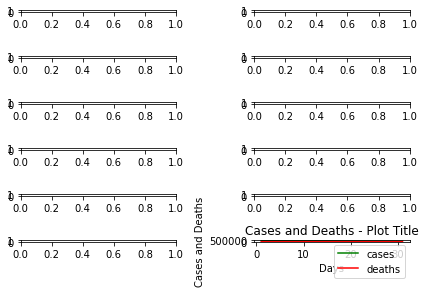

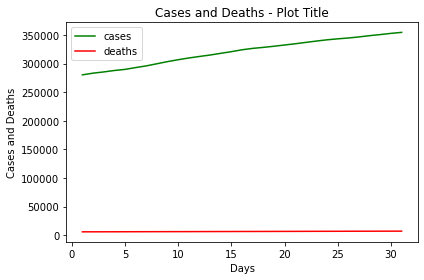

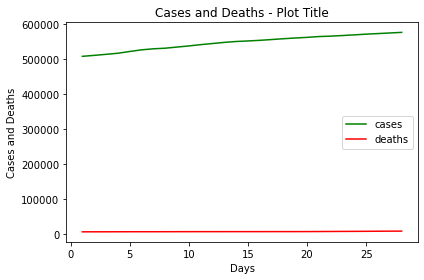

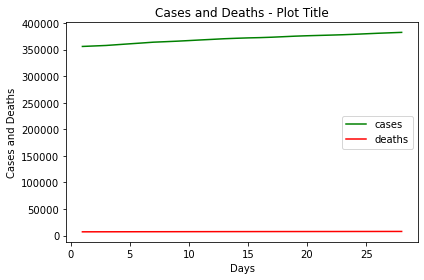

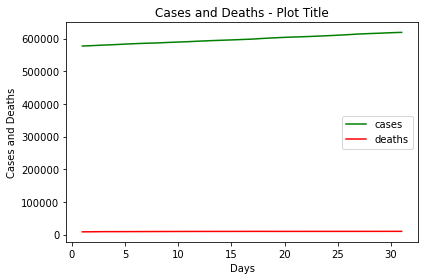

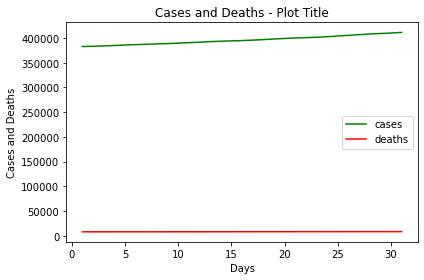

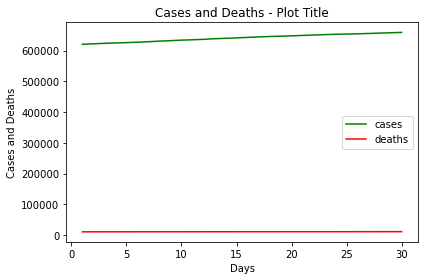

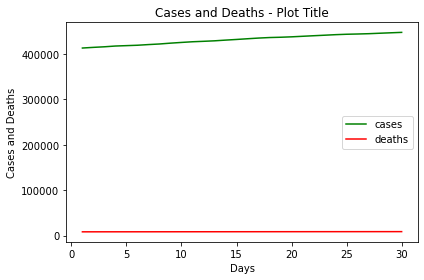

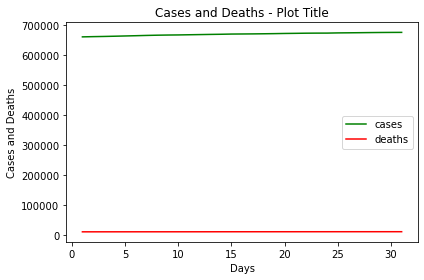

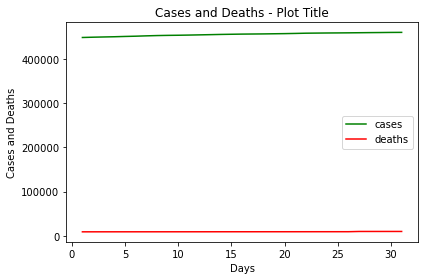

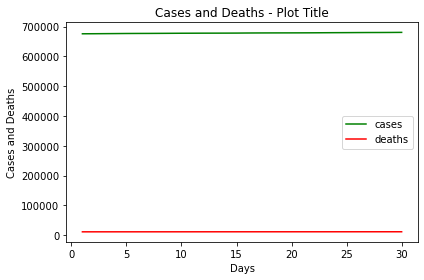

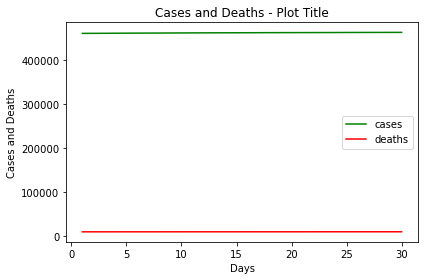

In [45]:
panel('all.csv', ['January', 'February', 'March', 'April', 'May', 'June'], 'Virginia', 'Maryland')